In [293]:
import tweepy
import sys,csv,re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [294]:
#authenticating
api_key = "EhO3iJ6xUlCxLaVFsKZTbPy0H"
api_secret_key = "MGNc2vzQtYYLJsLyZFeROJR36hiTc31GlAukwD6sR6XwXO12ZM"
access_token = "1102083971842682881-bkZs6TodQ31GAKOKaVNREEaBVJURE8"
access_secret_token = "Q8iNkIInrFGa1JGzgFHoPKUegq5O3UST9WN8mbfBITSN6"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_secret_token)
api = tweepy.API(auth)

In [295]:
import re
!pip install emoji
import emoji
from typing import List
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_tweet_text(tweet: str) -> str:

    # Remove URLs
    tweet = re.sub("http\S+", "", tweet)
    
    # Remove mentions
    tweet = re.sub("@\S+", "", tweet)
    
    # Convert emojis to text
    tweet = emoji.demojize(tweet, delimiters=(" ", " "))
    tweet = tweet.replace("_", " ")
    
    # Convert hashtags to words
    tweet = re.sub("#(\S+)", r"\1", tweet)

    # Remove RT (retweet) tags
    tweet = re.sub("^RT\s", "", tweet)
  
    # Remove any remaining emojis or emoticons
    tweet = re.sub(":[^:]*:", "", tweet)
    
    # Remove any non-ASCII characters
    tweet = tweet.encode("ascii", "ignore").decode()
    
    #remove stopwords
    tweet_words = tweet.split()
    tweet_words = [word for word in tweet_words if word not in stop_words]
    tweet = ' '.join(tweet_words)
    
    # Remove extra whitespace
    tweet = re.sub("\s+", " ", tweet).strip()
        
    # convert text to lowercase 
    tweet = str(tweet).lower()
    
    return tweet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [296]:
# topic = input("Enter the topic you want to analyze: ")
# count=int(input("Enter how many tweets to search: "))

topic = "india"
count = 10000
tweets = api.search_tweets(topic,count=count)

cleaned_tweets = []
for tweet in tweets:
    cleaned_tweet = clean_tweet_text(tweet.text)
    cleaned_tweets.append(cleaned_tweet)

data = pd.DataFrame(data=cleaned_tweets, columns=['Tweets'])
print(tweets[0].created_at)

2023-03-26 18:54:27+00:00


In [297]:
sentiment_id = SentimentIntensityAnalyzer()
lists = []

for index, row in data.iterrows():
  sentiment_score = sentiment_id.polarity_scores(row["Tweets"])
  lists.append(sentiment_score)
  
se = pd.Series(lists)
data['polarity'] = se.values
display(data.head(10))

,Tweets,polarity
0,"23 ,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,these 2 economic offenders gujarat currently f...,"{'neg': 0.17, 'neu': 0.68, 'pos': 0.15, 'compo..."
2,india cuba valoran trabajo conjunto en tecnolo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,hmmm... you may want take look history jesuits...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp..."
4,please favour watch all breathes hotstar. shou...,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp..."
5,believe - these khalistanis marched twitters h...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
6,"currency value us dollar, past year. russia +8...","{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp..."
7,web3madeinindia globe showing europe-africa sp...,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp..."
8,"the crane living free, around farms savior. no...","{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp..."
9,bilkis bano's rapist shares stage with gujarat...,"{'neg': 0.325, 'neu': 0.53, 'pos': 0.146, 'com..."


In [298]:

def percentage(part, whole): 
  temp = 100 * float(part) / float(whole)
  return format(temp,'.2f')

polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
total_polarity=0

for results in data['polarity']:
  polarity = results['compound']
  total_polarity += results['compound']
  if (polarity == 0):  # adding reaction of how people are reacting to find average later
    neutral += 1
  elif(polarity > 0 and polarity <= 0.3):
    wpositive += 1
  elif (polarity > 0.3 and polarity <= 0.6):
    positive += 1
  elif (polarity > 0.6 and polarity <= 1):
    spositive += 1
  elif (polarity > -0.3 and polarity <= 0):
    wnegative += 1
  elif (polarity > -0.6 and polarity <= -0.3):
    negative += 1
  elif (polarity > -1 and polarity <= -0.6):
    snegative += 1


In [299]:
max_value = max(positive, wpositive, spositive, negative, wnegative, snegative, neutral)

if max_value == positive:
  thought = "positive"
  value = positive
elif max_value == wpositive:
  thought = "weakly positive"
  value = wpositive
elif max_value == spositive:
  thought = "strongly positive"
  value = spositive
elif max_value == negative:
  thought = "negative"
  value = negative
elif max_value == wnegative:
  thought = "weakly negative"
  value = wnegative
elif max_value == snegative:
  thought = "strongly negative"
  value = snegative
else:
  thought = "neutral"
  value = neutral


print("How people are reacting on " + topic + " by analyzing " + str(count) + " tweets.")
print()
print("General Report: ")
print(thought + " with a value of " + str(value) + "%.")

positive = percentage(positive, len(data))
wpositive = percentage(wpositive, len(data))
spositive = percentage(spositive, len(data))
negative = percentage(negative, len(data))
wnegative = percentage(wnegative, len(data))
snegative = percentage(snegative, len(data))
neutral = percentage(neutral, len(data))

How people are reacting on india by analyzing 10000 tweets.

General Report: 
neutral with a value of 26%.


In [300]:
polarity = total_polarity/count

# printing out data
print("How people are reacting on " + topic + " by analyzing " + str(count) + " tweets.")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")


How people are reacting on india by analyzing 10000 tweets.

Detailed Report: 
12.00% people thought it was positive
7.00% people thought it was weakly positive
19.00% people thought it was strongly positive
19.00% people thought it was negative
9.00% people thought it was weakly negative
8.00% people thought it was strongly negative
26.00% people thought it was neutral


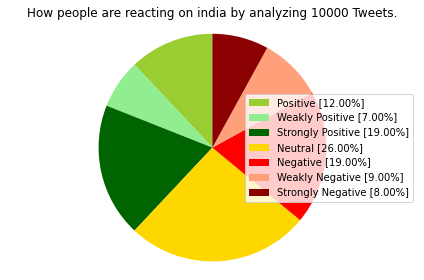

In [301]:
def plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
  labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
  sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
  colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title('How people are reacting on ' + topic + ' by analyzing ' + str(count) + ' Tweets.')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()


plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, topic, count)
